# <center>The Hydrogen Atom</center>

## The time-independent Schrodinger equation
## <center>$\left(-\frac{\hbar^2}{2\mu}\nabla^2 - \frac{e^2}{r}\right)\psi(r,\theta,\phi)=E\psi(r,\theta,\phi)$</center>
## <center>$\psi(r,\theta,\phi)=N \mathcal{L}^{2l+1}_{n-1-1}(\rho)\rho^l e^{-\rho/2}Y^m_l(\theta, \phi)$</center>
## The radial part of the hydrogen wavefunction 
## <center>$R_{nl}(r) = N \mathcal{L}^{2l+1}_{n-1-1}(\rho)\rho^l e^{-\rho/2}$</center>
## Wavefuntion energy values
## <center>$E_n = \frac{-\mu c^2 Z^2 \alpha^2}{2} \frac{1}{n^2}$</center>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import quantumworldX as qw
from scipy.integrate import quad

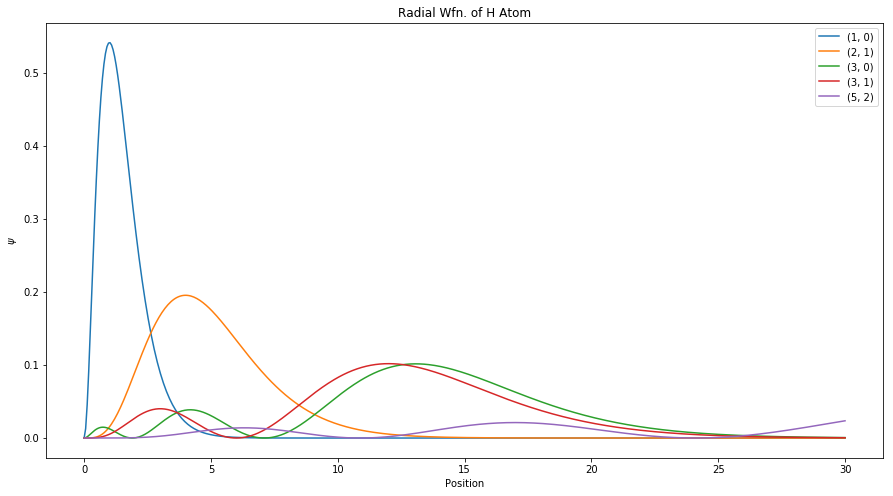

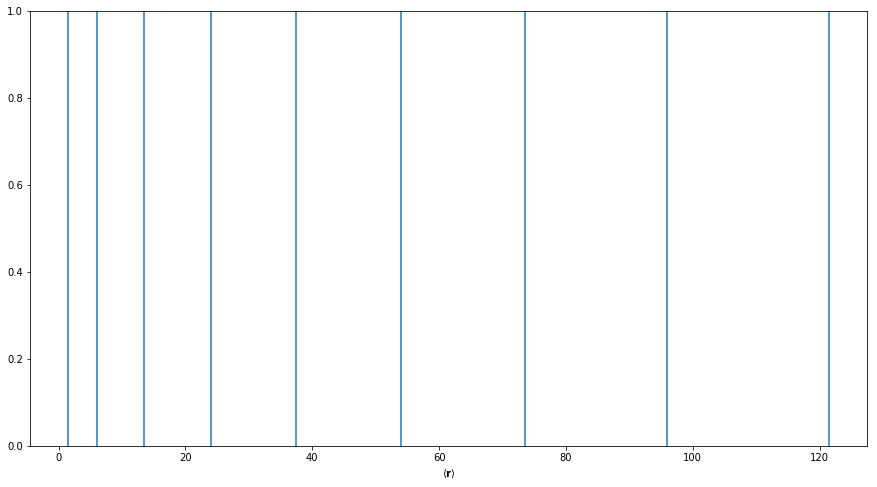

In [5]:
# inital variables
r=np.linspace(0.0, 30.0, 500)
l_m_list = [(1,0),(2,1),(3,0),(3,1),(5,2)]
ns = list(range(1,10))
r_wfn = np.zeros((len(l_m_list),len(r)))
r_exp = np.zeros(len(ns))
# iterate over the l/m list
plt.figure(figsize=(15,8))
for indx, i in enumerate(l_m_list):
    # get radial wfn, pdf and plot
    rad = r*qw.hydrogen.radial_wfn(r, i[0], i[1])
    r_wfn[indx]= qw.prob_density(rad)
    plt.plot(r,r_wfn[indx],label=str(i))
# extra plot stuff
plt.title('Radial Wfn. of H Atom')
plt.xlabel('Position')
plt.ylabel('$\psi$')
plt.legend()
plt.show()
plt.clf()
# iterate over 1 to 9
plt.figure(figsize=(15,8))
for indx,n  in enumerate(ns):
    # get radial expectation value and plot
    r_exp[indx], error = quad(qw.hydrogen.r_expectation_integrand, 0, np.inf, args=(n,0))
    plt.axvline(r_exp[indx])
# extra plot stuff
plt.xlabel('$ \langle \mathbf{r} \\rangle$')
plt.ylabel('')
plt.show()

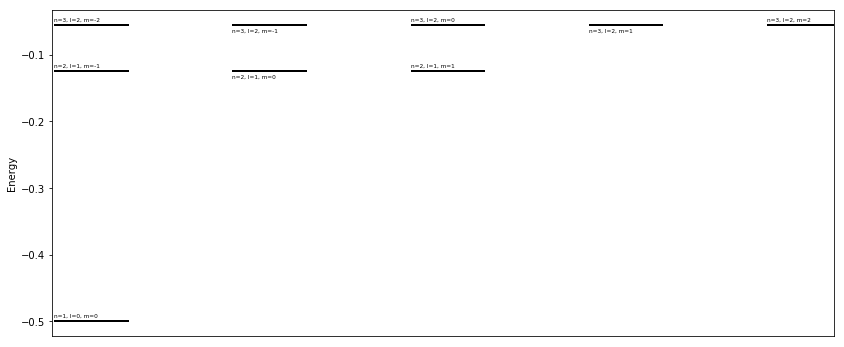

In [6]:
# create a function
def hydrogen_energy(n, a0 = 1.0, Z=1.0, mu = 1.0, c = 137.0, alpha = 1.0/137.0):
    En = -(mu*(c**2)*(Z**2)*(alpha**2))/2.0 * (1.0/(n**2))
    return En
# initialize
energy_list = []
# iterate over n quantum numbers
for n in range(1, 4):
    # set l to n-1
    l = n-1
    # iterate over m quantum numbers
    for m in range(-l, l+1):
        # make dictionary, calculate and store the energy, add to a list
        qdict ={"n":n, "l":l, "m":m}
        qdict['energy']=hydrogen_energy(qdict['n'])
        energy_list.append(qdict)
# sorted energy values
e_vals = np.unique([e['energy'] for e in energy_list])
# plot a energy diagram
plt.figure(figsize=(15,8))
qw.plot_energy_diagram(energy_list)
plt.show()

## <center>Transition energies (Hydrogen Spectogram)</center>


## <center>$E_{n_1 \rightarrow n_2} = \frac{-\mu c^2 Z^2 \alpha^2}{2} \left(\frac{1}{n_1^2} - \frac{1}{n_2^2} \right)$</center>

## <font color='red'>With these transition energies we'll make spectrograms, which show which part of the visible spectrum is absorbed by the Hydrogen atom (or emitted, if the atom is excited).Looking at spectrograms is exactly how scientist are able to search for absence/presence of elements in space! </font>
<img src="hydrogen_emission.png">

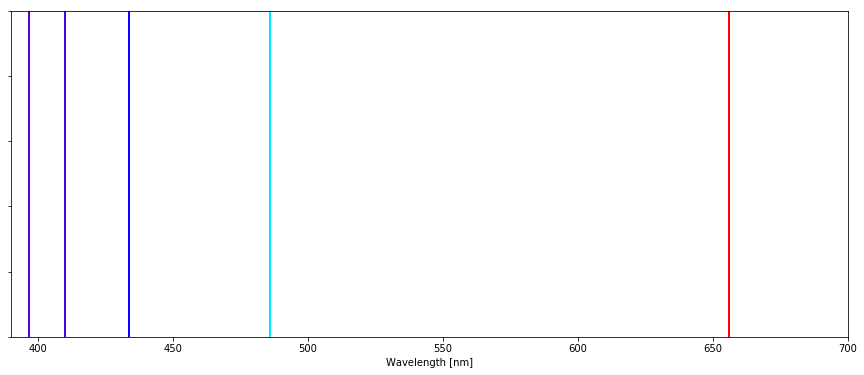

In [7]:
# create function definition
def hydrogen_transition_energy(n1, n2, a0 = 1.0, Z=1.0, mu = 1.0, c = 137.0, alpha = 1.0/137.0):
    En = -(mu* (c**2) * (Z**2) * (alpha**2) )/2.0 * (1.0/(n1**2) - 1.0/(n2**2))
    return En
# initial variable
spectrum = []
# iterate over n1
for n1 in range(1, 11):
    # iterate over n2
    for n2 in range(1, 11):
        if n1 != n2: # Ensures that a transition actually happens
            qdict = {"n1":n1, "l1":0, "m1":0, "n2":n2, "l2":0, "m2":0}
            qdict['energy']=hydrogen_transition_energy(qdict['n1'],qdict['n2'])
            spectrum.append(qdict)
# sorted energy values
e_vals = np.unique([s['energy'] for s in spectrum])
# iterate over spectrum to plot wavelength color bands
plt.figure(figsize=(15,6))
for el in spectrum:
    wavel = qw.hartrees_to_wavelength(el['energy'])
    c = qw.wavelength_to_colour(wavel)
    plt.axvline(wavel, color=c,lw=2)
# plot options
plt.xlabel('Wavelength [nm]')
plt.xlim([390, 700])
plt.tick_params(labelleft=False)
plt.show()

# <center>The Helium Atom</center>

<img src="Helium_atom_QM.png">
## Solving the Schrödinger equation for molecular systems is <font color="red"> a many body problem </font>. The Schrödinger equation <font color="red"> cannot be solved analytically</font> for more than 2 body (with some exceptions) 
## $\rightarrow$ approximations
## $\rightarrow$  Ground wavefunction approximation and Configratuion Interaction (No electron-electron repulsion (<font color="red">hard to compute</font>) and adding excitations to the wavefunction in a smart way)
## <center>$\Psi(\vec{r_1},\vec{r_2}) = c_1\psi_1(\vec{r_1},\vec{r_2}) + c_2\psi_2(\vec{r_1},\vec{r_2})$</center>
## <center>$\Psi(\vec{r_1},\vec{r_2}) = c_1\;\phi_{1S}(\vec{r_1})\phi_{1S}(\vec{r_2}) + c_2[\frac{1}{\sqrt{2}}(\;\phi_{1S}(\vec{r_1})\phi_{2S}(\vec{r_2})+\phi_{1S}(\vec{r_2})\phi_{2S}(\vec{r_1})\;)]\;)$</center>
## as <font color="red">hydrogen-like</font> orbitals are eigenfunctions of the operators $-\frac{1}{2}\nabla_{r_1}^2 - \frac{Z}{r_1}$:
## <center>$\left( -\frac{1}{2}\nabla_{r_1}^2 - \frac{Z}{r_1} \right) \phi_{1S}(\vec{r_1}) = -Z^2\frac{1}{2}\phi_{1S}(\vec{r_1})$</center>
## <center>$\left( -\frac{1}{2}\nabla_{r_1}^2 - \frac{Z}{r_1} \right) \phi_{2S}(\vec{r_1}) = -\frac{Z^2}{8}\phi_{2S}(\vec{r_1})$</center>
## <center>$\hat{H} = -\frac{1}{2}\nabla_{r_1}^2 -\frac{1}{2}\nabla_{r_2}^2 - \frac{Z}{r_1} - \frac{Z}{r_2} + \frac{1}{r_{12}}$</center>
## <center>$H = \begin{pmatrix}
H_{11} & H_{12} \\
H_{21} & H_{22} 
\end{pmatrix}$</center>
## <center>$H_{11} =  \left\langle  \phi_{1S}(\vec{r_1})\phi_{1S}(\vec{r_2})|\;\hat{H}\;|\;\phi_{1S}(\vec{r_1})\phi_{1S}(\vec{r_2}) \right\rangle$</center>
## <center>$H_{12} = \frac{1}{\sqrt{2}} \left\langle \phi_{1S}(\vec{r_1})\phi_{1S}(\vec{r_2})\;|\;\hat{H}\;|\phi_{1S}(\vec{r_1})\phi_{2S}(\vec{r_2})+\phi_{1S}(\vec{r_2})\phi_{2S}(\vec{r_1}) \right\rangle$</center>
## <center>$H_{21} = \cdots  $</center>
## <center>$H_{22} = \cdots $</center>

## $\rightarrow$ Treating missing effect via pertubation theory, by adding the electron-electron repulsion perturbatively to an initial approximation(not presented here)
## $\rightarrow$ Using a bigger basis set of possible atomic orbitals(not presented here)
## <font color="red"> All this to improve the accuracy for this little 2 proton, 2 electron fellow (and many other  multi-electron fellows)</font>

In [8]:
H = qw.helium.ci_hamiltonian()
hartree_to_ev = 27.211399 # conversion factor
eigvals, eigvecs = np.linalg.eigh(H)
# retrieve ground state info
ci_g =eigvals[0]*hartree_to_ev
c0_g =eigvecs[0,0]
c1_g = eigvecs[1,0]
print('The c0 and c1 coefficients are --> ', eigvecs[:,0] )
# calculate error
exact_g = -79
rel_error = np.abs(exact_g - ci_g)/np.abs(exact_g)*100
print('Exact Energy -->',exact_g,'eV')
print('Our Configuration interaction estimate --> ', ci_g,'eV')
print('With a relative error of ',rel_error,'%')

The c0 and c1 coefficients are -->  [-0.18149986  0.98339097]
Exact Energy --> -79 eV
Our Configuration interaction estimate -->  -112.09323019097499 eV
With a relative error of  41.89016479870252 %


.

.

.

# <center>The variational principle</center>

## The variational principle puts a <font color="red">lower bound</font> on the possible values we can get when solving the Schrodinger equation, since any wavefunction $\psi$ will have to satisfy:

## <center>$E_{ground}≤⟨\psi|H|\psi⟩$</center>

## $\rightarrow$ optimize the $\psi$ to get closer to $E_{ground}$.

## Strategy:
## $\rightarrow$  Create a wavefunction $\psi(\zeta)$ as a function of a few parameters
## $\rightarrow$  Create a energy function $E(\zeta)$ that depend on our previous wavefunction.
## $\rightarrow$  Optimize numerically this function over $\zeta$
## We can similarly define many different wavefunction using the formula:
## <center>$\psi = u^a t^b u^c e^{-\zeta s}$</center>
## can use `scipy.optimize`, specifically `minimize` to find the values of $\zeta$ that minimize the expect value, that is the energy... but this can sometimes require a lot of computing time
## Will still never get the exact energies unless you have the exact wavefunction.

## There are other methods based on other theories of electronic structure. Chosing a method is always a balance between computing speed and accuracy. Sometimes your molecule is very big and you need a cheap but less accurate method, or sometimes you need a lot of precision and have some computation time to spare.
##  In the Born-Oppenheimer approximation:
<img src="panorama.png">

## $\rightarrow$ <font color="red">DFT:</font> Based on charge density, a physical measurable, pretty cheap $\mathcal{O}(n^3)−\mathcal{O}(n^4)$ and accurate, not 100% reliable. You have to decide on a functional and a basis set. Also the Hohenberg-Kohn theorems state that any molecular property can be derived from the charge density and there exists a universal functional which will solve all your problems. 
## $\rightarrow$ <font color="red">Hartree-Fock and Post-HF:</font> Pretty expensive $\mathcal{O}(n^3)−\mathcal{O}(n!)$, but reliable and there is a clear idea of how to systematically improve your solution and to arrive to the exact theoretical limit.
## $\rightarrow$ <font color="red">Quantum Monte Carlo:</font> Highly accurate, extremely parallelizable (100k computers @ 99% efficiency) and scaling at $\mathcal{O}(n^3)$. Solves the $n^3$ dimensional integral of $\langle \psi | H | \psi \rangle$ via stochastic integration. In a sense you are simulating the electrons drifting, diffusing and interacting randomly around your atoms.
## $\rightarrow$ <font color="red"> Semi-empirical:</font> Relies on force fields, parameterizations, model-fitting and other neat tricks to get cheap and semi accurate results for a fraction of the cost.
## $\rightarrow$ <font color="red"> Perturbation-Theory:</font> Many methods can be enhanced by treating missing effects via perturbations.
## Each of these methods has it's strengths and weakness and is used in different contexts within chemistry.